# Gráficos de dependencia parcial

Un **gráfico de dependencia parcial** muestra la predicción del modelo en función de una ($x_k$) o dos ($x_j, x_k$) características:
$$\begin{align*}
\bar{f}_k(x_k)&=\frac{1}{N}\sum_{n=1}^N f(\boldsymbol{x}_{n,-k},x_k)\\%
\bar{f}_{jk}(x_j,x_k)&=\frac{1}{N}\sum_{n=1}^N f(\boldsymbol{x}_{n,-jk},x_j,x_k)%
\end{align*}$$
En clasificación binaria se muestra la log-odds en función de $x_k$ (y $x_k$).

**Ejemplo:** dependencia parcial de log-odds de la clase spam; aumenta con la frecuencia de ch! y remove; edu y hp la disminuyen

In [1]:
import pandas as pd

df = pd.read_csv("https://github.com/empathy87/The-Elements-of-Statistical-Learning-Python-Notebooks/blob/master/data/Spam.txt?raw=True")
X = df.drop(['test','spam'], axis=1); y = df.spam.values; X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

In [2]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators=100, random_state=0).fit(X, y)

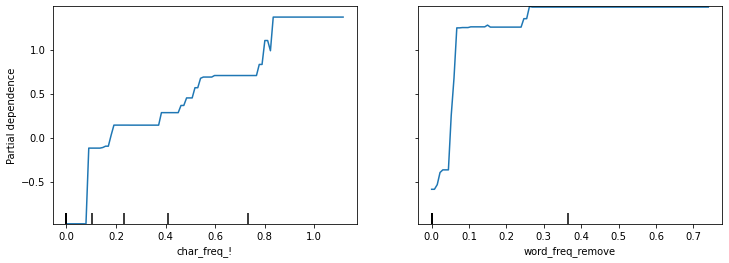

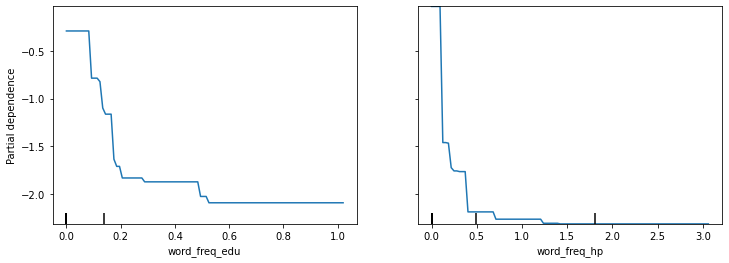

In [3]:
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay

fig, ax = plt.subplots(figsize=(12, 4))
PartialDependenceDisplay.from_estimator(clf, X, ['char_freq_!', 'word_freq_remove'], ax=ax)
fig, ax = plt.subplots(figsize=(12, 4))
PartialDependenceDisplay.from_estimator(clf, X, ['word_freq_edu', 'word_freq_hp'], ax=ax);